#Feature Engineering Lab
In this lab, we will discover different methods of applying feature engineering on numerical and categorical data. We will walk through the following:

- Handle Missing Values (Numerical and Categorical)
- Encoding (Categorical)
- Feature Scaling (Numerical)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

## `Section 1` Connect to Google Drive

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Specify the Google Drive file ID
  1. Navigate to the Google Drive folder where your `tweet_data.csv` file is located
  2. Right click on the file and click "Share" > "Copy Link"
  3. The FILE_ID is the unique identifier that follows "/file/d/" and ends before "/view" in the link. Copy this identifier
  4. For example, in the link `https://drive.google.com/file/d/ABC123/view`, the file ID is **ABC123**

In [ ]:
# Download a file based on its file ID.

# A file ID looks like: 1OkleqqLYStgJjgR7L9S40lRradfhvEQy
titanic_file_id = 'TITANIC_FILE_ID' # Check your own ID in GDrive
titanic = drive.CreateFile({'id': titanic_file_id})

train_file_id = 'TRAIN_FILE_ID'
train = drive.CreateFile({'id': train_file_id})

# Save file in Colab memory
titanic.GetContentFile('titanic.csv')
train.GetContentFile('train.csv')

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

## `Section 2` Handling Missing Values

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **2.1** Numerical Data Methods

#### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** Mean/Median/Mode replacement </h4>
These are more frequently used methods of handling missing numerical data.

- Import `pandas`
- Read in the `titanic` dataset to a dataframe, bring in only `Age`, `Fare` and `Survived` columns
- Check the first 6 lines

In [ ]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


- Check the shape of the dataset

In [ ]:
# Write your code here

(891, 3)

- Use `isnull()` and `sum()` functions to get count of null values in each column

In [ ]:
# Write your code here

Survived      0
Age         177
Fare          0
dtype: int64

- Calculate the median of the `Age` column using `median()` function
- Use the `fillna()` function to fill missing values with the median of the column
- Check first 6 records to see if missing `Age` values are replaced

In [ ]:
# Write your code here
# Calculate the median of the column

# Fill missing values with the median using fillna()



,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,30.125102,8.4583


#### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** Regression Imputation </h4>

For this section, we will read in the `titanic` dataset and use `Age`, `Fare` and `Survived` columns.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

- Create two dataframes, `df_missing` and `df_known` based on whether `Age` is null - these two datasets will act as test and training sets
- Create X (`Survived` and `Fare`) and y (`Age`) feature and target variables using `df_known` as the training set - these will be used as inputs in our regression model
- Create a linear regression model using `LinearRegression()`
- Fit X and y to the model
- Use the fitted model to impute missing `Age` values in `df_missing` (test dataset)
- Update the original dataframe with imputed values (hint: use `df.loc`)
- Print first 6 records and check if missing values are imputed

In [ ]:
# Create two dataframes: one with missing 'Age' values and one with known 'Age' values



# Define features and target
X =   # Features used for regression imputation
y =   # Target variable

# Create a Linear Regression model using LinearRegression()


# Fit the model to predict 'Age' based on 'Survived' and 'Fare'


# Impute missing 'Age' values using the regression model


# Update the original DataFrame with the imputed values


# Display the DataFrame with imputed values


,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,30.125102,8.4583


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **2.2** Categorical Data Methods

#### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Mode Imputation </h4>

- Read in the `train.csv` dataset to a dataframe. Bring in only `BsmtQual`,`FireplaceQu`, `GarageType` and `SalePrice`  columns

In [ ]:
import pandas as pd
%matplotlib inline

# Write your code here


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


- Print the first 20 records and observe the categorical columns

In [ ]:
# Write your code here

- Use `isnull()` and `sum()` to find the missing value count in each column

In [ ]:
# Write your code here

`BsmtQual` and `GarageType`  have a  smaller amount of missing values. Therefore we can simply replace the missing values with the most frequent value.
- For both of the above columns, check how many times each value appears. Use `value_counts()`

In [ ]:
# Write your code here for BsmtQual value counts

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
# Write your code here for GarageType value counts

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

- Use `mode()` to find the category with highest frequency

In [ ]:
# Write your code here

- Replace missing values in `BsmtQual` using `mode()`

In [ ]:
# Write your code here

'TA'

- Replace missing values in `GarageType` using `mode()`

In [ ]:
# Write your code here

- Show the first 20 rows of the imputed DataFrame

In [ ]:
# Write your code here

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

## `Section 3` Encoding

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **3.1** Dummy Encoding


- Read in the `titanic` data to a dataframe. Bring in only the `Sex` column
- Check the first 5 records

In [ ]:
# Write your code here

,Sex
0,male
1,female
2,female
3,female
4,male


- Use `get_dummies()` to encode the `Sex` column
- Check the first 5 records

In [ ]:
# Write your code here

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


- Set `drop_first=True` in `get_dummies()` and obeserve the output

In [ ]:
# Write your code here

,male
0,1
1,0
2,0
3,0
4,1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **3.2** One-Hot Encoding

- Read in the `titanic` data to a dataframe. Bring in only the `Sex` column
- Check the first 5 records

In [ ]:
# Write your code here

,Sex
0,male
1,female
2,female
3,female
4,male


- Use `get_dummies()` to encode the `Sex` column
- Check the first 5 records

In [ ]:
# Write your code here

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

## `Section 4` Feature Scaling


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **4.1** Standardisation

- Read in the `titanic` data to a dataframe. Bring in only `Pclass`, `Age`, `Fare` and `Survived` columns
- Check the first 5 records

In [ ]:
# Write your code here

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


- Before scaling, replace missing values in the `Age` column with the median value

In [ ]:
# Write your code here

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

- Use `isnull()` and `sum()` to check that the values have been replaced

In [ ]:
# Write your code here

For standardisation, we can use `StandardScaler` from the `sklearn` library.

In [ ]:
from sklearn.preprocessing import StandardScaler

- Create an instance of `StandardScaler`

In [ ]:
# Write your code here

[[-0.78927234  0.82737724 -0.56573646 -0.50244517]
 [ 1.2669898  -1.56610693  0.66386103  0.78684529]
 [ 1.2669898   0.82737724 -0.25833709 -0.48885426]
 ...
 [-0.78927234  0.82737724 -0.1046374  -0.17626324]
 [ 1.2669898  -1.56610693 -0.25833709 -0.04438104]
 [-0.78927234  0.82737724  0.20276197 -0.49237783]]


- Use `fit_transform()` to fit the dataframe to the `StandardScaler` instance. Call this `df_scaled`

In [ ]:
# Write your code here

- Print `df_scaled` to check the output

In [ ]:
# Write your code here

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


- Convert the `df_scaled` numpy array to a dataframe using `pd.DataFrame()`

In [ ]:
# Write your code here

Here we import `matplotlib` to plot histograms of `Pclass`, `Age` and `Fare`

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

- Plot a histogram for `Pclass`

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

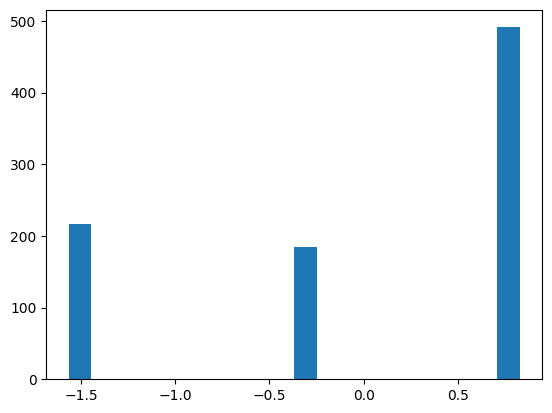

In [ ]:
# Write your code here

- Plot a histogram for `Age`

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

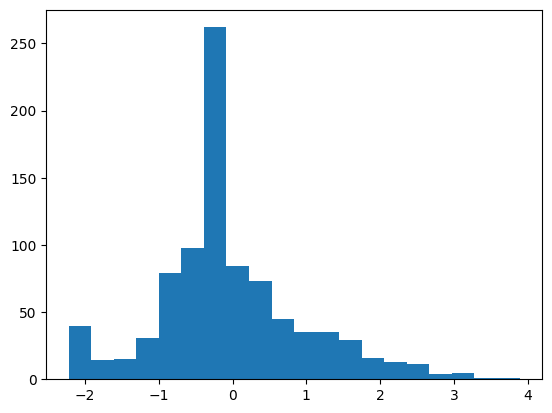

In [ ]:
# Write your code here

- Plot histogram for `Fare`

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

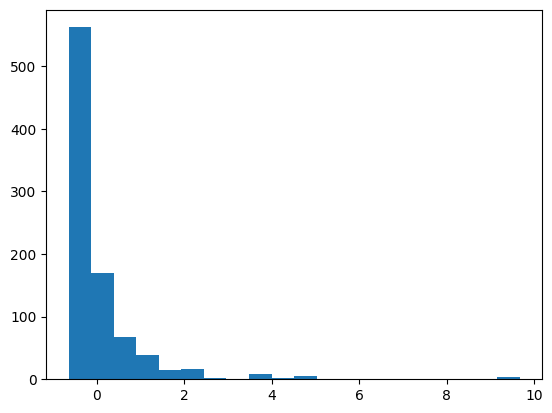

In [ ]:
# Write your code here

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

### **4.2** Normalisation

Normalisation using `MinMaxScaler()` scales the values between 0 and 1.

In [ ]:
import pandas as pd

- Read in the `titanic` data to a dataframe. Bring in only `Pclass`, `Age`, `Fare` and `Survived` columns
- Check first 5 records

In [ ]:
# Write your code here

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


- Before scaling, replace missing values in `Age` column with median value

In [ ]:
# Write your code here

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

- Use `isnull()` and `sum()` to check that the values have been replaced

In [ ]:
# Write your code here

`MinMaxScaler` can be used to transform features by scaling each feature to a given range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

- Create an instance of `MinMaxScaler`

In [ ]:
# Write your code here

- Use `fit_transform()` to fit the dataframe to the `MinMaxScaler` instance

In [ ]:
# Write your code here

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

- Print `df_scaled` to check  the output

In [ ]:
# Write your code here

- Convert the `df_scaled` numpy array to a dataframe using `pd.DataFrame()`

In [ ]:
# Write your code here

Similar to the exercise above, will use `matplotlib` to plot histograms of `Pclass`, `Age` and `Fare`
- Plot histograms and check the shape of the distribution and range of values

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

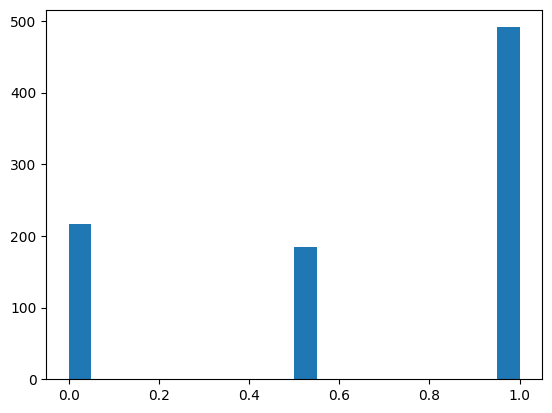

In [ ]:
# Write your code here

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

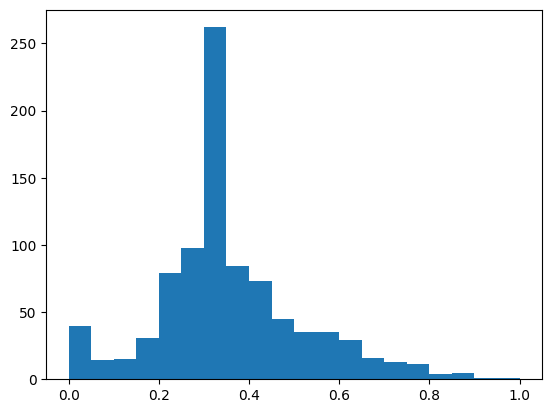

In [ ]:
# Write your code here

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

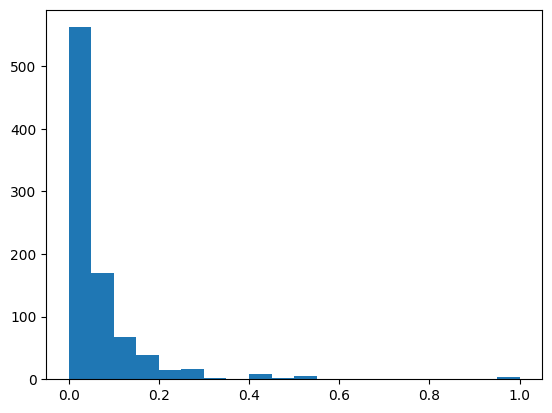

In [ ]:
# Write your code here